In [40]:
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl         
import matplotlib.pyplot as plt 
import seaborn as sns
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from collections import Counter
from scipy.stats.stats import pearsonr
from string import ascii_letters

# Some helper functions to make our plots cleaner with Plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

In [41]:
def correction(x):
    '''
    Columns value corrections
    '''
    if type(x)==str:
        x=x.replace('$','')
        x=x.replace(',','')
        x=float(x)    
    return (x)

In [42]:
def correction2(x):
    '''
    Columns value corrections
    '''
    if type(x)==str:
        x=x.replace('%','')
        x=float(x)/100.0
    return (x)

In [43]:
def to_int(x):
    '''
    Columns value corrections
    '''
    if x=='f' or x== 'False':
        x=x.replace('f','0')
    elif x=='t' or x == 'True':
        x=x.replace('t','1')
    return int(x)

In [44]:
def createAmenities(x):
    '''
    Convert the Amenities column into more analytical words
    '''
    val = x.replace('{','').replace('}','').replace('"','').replace(' ','_').replace(',',' ')
    val = val.split()
    return val

In [45]:
def gen_xaxis(title):
    """
    Creates the X Axis layout and title
    """
    xaxis = dict(
            title=title,
            titlefont=dict(
                color='#AAAAAA'
            ),
            showgrid=False,
            color='#AAAAAA',
            )
    return xaxis

In [46]:
def gen_yaxis(title):
    """
    Creates the Y Axis layout and title
    """
    yaxis=dict(
            title=title,
            titlefont=dict(
                color='#AAAAAA'
            ),
            showgrid=False,
            color='#AAAAAA',
            )
    return yaxis

In [47]:
def gen_layout(charttitle, xtitle, ytitle, lmarg, h, annotations=None):  
    """
    Creates whole layout, with both axis, annotations, size and margin
    """
    return go.Layout(title=charttitle, 
                     height=h, 
                     width=800,
                     showlegend=False,
                     xaxis=gen_xaxis(xtitle), 
                     yaxis=gen_yaxis(ytitle),
                     annotations = annotations,
                     margin=dict(l=lmarg),
                    )

In [48]:
def gen_bars(data, color, orient):
    """
    Generates the bars for plotting, with their color and orient
    """
    bars = []
    for label, label_df in data.groupby(color):
        if orient == 'h':
            label_df = label_df.sort_values(by='x', ascending=True)
        if label == 'a':
            label = 'lightgray'
        bars.append(go.Bar(x=label_df.x,
                           y=label_df.y,
                           name=label,
                           marker={'color': label},
                           orientation = orient
                          )
                   )
    return bars

def gen_annotations(annot):
    """
    Generates annotations to insert in the chart
    """
    if annot is None:
        return []
    
    annotations = []
    # Adding labels
    for d in annot:
        annotations.append(dict(xref='paper', x=d['x'], y=d['y'],
                           xanchor='left', yanchor='bottom',
                           text= d['text'],
                           font=dict(size=13,
                           color=d['color']),
                           showarrow=False))
    return annotations

def generate_barplot(text, annot_dict, orient='v', lmarg=120, h=400):
    """
    Generate the barplot with all data, using previous helper functions
    """
    layout = gen_layout(text[0], text[1], text[2], lmarg, h, gen_annotations(annot_dict))
    fig = go.Figure(data=gen_bars(barplot, 'color', orient=orient), layout=layout)
    return iplot(fig)

def rangeScore(x):
    '''
    Set the bins for the score-range.
    '''
    value = ''
    if (x>= 0 and x < 10):
        value = '0-10'
    elif (x>= 10 and x < 20):
        value = '10-20'
    elif (x>= 20 and x < 30):
        value = '20-30'
    elif (x>= 30.0 and x < 40.0):
        value = '30-40'
    elif (x>= 40 and x < 50):
        value = '40-50'
    elif (x>= 50 and x < 60):
        value = '50-60'
    elif (x>= 60 and x < 70):
        value = '60-70'        
    elif (x>= 70 and x < 80):
        value = '70-80'
    elif (x>= 80 and x < 90):
        value = '80-90'
    elif (x>= 90 and x < 100):
        value = '90-100'
    elif x>= 100:
        value = '100+'
        
    return value

In [49]:
m = pd.read_csv("/content/df_Chicago_m (1).csv")
w = pd.read_csv("/content/df_Chicago_w (1).csv")

In [50]:
m.isnull().sum()

Unnamed: 0                  0
Unnamed: 0.1                0
id                          0
log_price                   0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                   1
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
description                 0
first_review               88
host_has_profile_pic        0
host_identity_verified      0
host_response_rate         11
instant_bookable            0
latitude                    0
longitude                   0
name                        0
neighbourhood             109
number_of_reviews           0
review_scores_rating       92
thumbnail_url             192
zipcode                     8
bedrooms                    0
beds                        0
w_distance                  0
m_distance                  0
dtype: int64

In [51]:
m = m[m['review_scores_rating'].notna()]# 420개

In [52]:
m['new_score_reviews2'] = m['number_of_reviews'] * m['review_scores_rating'] / 10
w['new_score_reviews2'] = w['number_of_reviews'] * w['review_scores_rating'] / 10

In [53]:
print(np.max(m['new_score_reviews2']))
print(np.min(m['new_score_reviews2']))
print(np.max(w['new_score_reviews2']))
print(np.min(w['new_score_reviews2']))

3496.8
6.0
3636.3
6.0


In [54]:
w # 데이터 521개

,Unnamed: 0,Unnamed: 0.1,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,w_distance,new_score_reviews2
0,5,109,235281,199.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",9,2.0,Real Bed,strict,True,Chicago,This place was FULLY remodeled in 2016 for one...,2010-06-16,t,t,100%,f,41.933496,-87.658119,5 QUEEN BEDS / 2 FULL BATHS / SLEEPS 10! Suite...,Lakeview,10,96.0,https://a0.muscache.com/im/pictures/7c1650ee-5...,60614.0,2.0,5.0,0.55,96.0
1,17,514,11750272,155.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,strict,False,Chicago,Guests of City Scene are delighted to stay in ...,NaN,t,f,67%,f,41.920585,-87.657767,Two Bedroom Suite in Lincoln Park,Lincoln Park,0,NaN,NaN,60614.0,2.0,2.0,1.96,NaN
2,23,631,9614676,65.0,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,moderate,True,Chicago,"Located in the middle of everything, my studio...",2004-05-16,t,t,100%,f,41.926418,-87.640889,"Steps from public transport, Lake, & restaurants",Lincoln Park,20,94.0,https://a0.muscache.com/im/pictures/34335a2d-4...,60614.0,0.0,1.0,1.78,188.0
3,25,674,15323278,99.0,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,strict,True,Chicago,Ideally located steps from Chicago's vibrant S...,2016-03-16,t,t,100%,f,41.941787,-87.661936,Private floor 2BR + 1 BA + Parking,Lakeview,43,98.0,https://a0.muscache.com/im/pictures/36f820e6-e...,60657.0,2.0,2.0,0.67,421.4
4,29,781,16172498,400.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.0,Real Bed,flexible,True,Chicago,"Located just 3 blocks from Wrigley Field, our ...",2022-07-16,t,t,100%,f,41.944907,-87.654502,Wrigleyville Greystone Flat! (1st Floor),Lakeview,8,98.0,NaN,60657.0,3.0,3.0,0.76,78.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,3675,73119,11719535,275.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,2.0,Real Bed,strict,False,Chicago,"This is our 2 bedroom, 2 bathroom fully furnis...",2008-02-16,t,t,91%,t,41.940587,-87.679519,2BD/2BA Garden w/Fireplace (vng),Roscoe Village,13,95.0,https://a0.muscache.com/im/pictures/84729264/f...,60618.0,2.0,3.0,2.00,123.5
517,3683,73291,8348797,250.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,2.0,Real Bed,moderate,True,Chicago,2 bed / 2 bath modern condo with hardwood floo...,2025-08-14,t,t,NaN,f,41.940092,-87.656966,Penthouse condo w/ private roof deck! 2BR / 2 BA,Lakeview,6,100.0,NaN,60657.0,2.0,2.0,0.25,60.0
518,3697,73631,14902763,96.0,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2,1.0,Real Bed,flexible,True,Chicago,Cozy apartment in quiet neighborhood with live...,2007-05-17,t,t,80%,f,41.924912,-87.654539,The Cozy Pad,Lincoln Park,1,100.0,https://a0.muscache.com/im/pictures/eea32aaf-6...,60614.0,1.0,1.0,1.47,10.0
519,3699,73673,20919723,225.0,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",6,1.0,Real Bed,flexible,True,Chicago,Five blocks from Wrigley Field. Walking Distan...,NaN,t,f,100%,t,41.951256,-87.661715,Wriglyville 3bdrm 1 bath Gem GoCubs (parking a...,Wrigleyville,0,NaN,https://a0.muscache.com/im/pictures/089ea160-d...,60613.0,3.0,3.0,1.55,NaN


In [55]:
w.isnull().sum()

Unnamed: 0                  0
Unnamed: 0.1                0
id                          0
log_price                   0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                   0
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
description                 0
first_review               61
host_has_profile_pic        0
host_identity_verified      0
host_response_rate         27
instant_bookable            0
latitude                    0
longitude                   0
name                        0
neighbourhood              87
number_of_reviews           0
review_scores_rating       65
thumbnail_url             164
zipcode                     2
bedrooms                    0
beds                        0
w_distance                  0
new_score_reviews2         65
dtype: int64

In [56]:
w = w[w['review_scores_rating'].notna()] # 456개

# **Michigan Avenue**

Decide the threshold of Top Performer and Low Performer listings.

In [57]:
'''
the definition and print the value.
'''
top75flag = m['new_score_reviews2'].quantile(0.75)
upto25flag = m['new_score_reviews2'].quantile(0.25)

m['top75'] = m.new_score_reviews2 >= top75flag
m['upto25'] = m.new_score_reviews2 <= upto25flag

print('The boundaries of top performer listings:',top75flag)
print('The boundaries of low performer listings:',upto25flag)

The boundaries of top performer listings: 348.725
The boundaries of low performer listings: 40.0


Visualize the defined class

In [58]:
### Create a table for the visualization essentials ###
### Generate score bins, creating new tables for the class colors, and count distributions of each bins. ###
# a columns of bins.
m['score_ranges'] = m['new_score_reviews2'].apply(rangeScore)
print(m['score_ranges'])
# table coloring purpose.
top75 = m.groupby('score_ranges', as_index = False)['top75'].max(key = m.count).rename(columns={'score_ranges':'Score'})
upto25 = m.groupby('score_ranges', as_index = False)['upto25'].max(key = m.count).rename(columns={'score_ranges':'Score'})
# count distributions of score bins.
barplot = m[['id','new_score_reviews2']]
barplot['Qty'] = barplot['new_score_reviews2'].apply(rangeScore)
barplot = barplot.Qty.value_counts(sort=True).to_frame().reset_index()
barplot = barplot.rename(columns={'index': 'Score'})

# merging color flag.
barplot = barplot.merge(top75, on = 'Score')
barplot = barplot.merge(upto25)
# creating color for the vis.
barplot['color'] = barplot.top75.apply(lambda x: 'mediumaquamarine' if x else 'lightgray')
# manually change the color of the first index become crimson, to indicate the class of low performer listings.
barplot.iloc[0,4] = 'crimson'
# change Score column and Qty column into x and y for the vis purpose.
barplot = barplot.rename(columns={'Score':'x','Qty':'y'})

# Some of the annotations for the vis.
title_text = ['<b>Comparison Listings Performance between Top Performer and Low Performer</b>', 'Reviews per Month x Review Score Ratings / 10', 'Quantity of Listings']
annotations = [{'x': 0.03, 'y': 1900, 'text': 'Low Performer Had Score Up to 25 Percentile','color': 'gray'},
              {'x': 0.39, 'y': 300, 'text': 'Top Performer Had Score above 90 Percentile','color': 'mediumaquamarine'}]

generate_barplot(title_text, annotations)

0       40-50
1       10-20
2        0-10
3        100+
6        100+
        ...  
507      100+
508    90-100
509      0-10
510      100+
511     60-70
Name: score_ranges, Length: 420, dtype: object


TypeError: ignored

관련없는 열 drop

In [62]:
irrelevant_colmuns = ['Unnamed: 0','Unnamed: 0.1','id','city','first_review','name','neighbourhood','thumbnail_url','zipcode','top75','upto25']

In [63]:
relevant_df = .drop(irrelevant_colmuns, axis = 1)

correlation

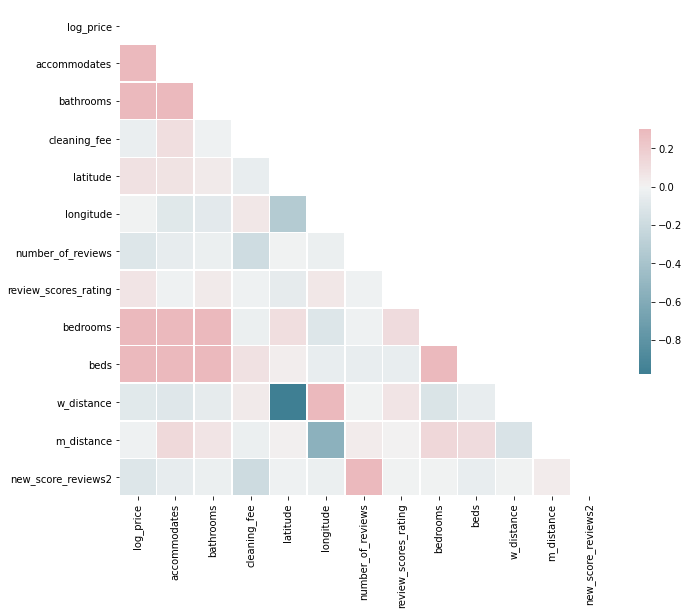

In [67]:
corr = relevant_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
A=m.corr().unstack().sort_values(ascending=False)
print('The correlation of the new_score_reviews against all:', A['new_score_reviews2'][1:-1])

The correlation of the new_score_reviews against all: number_of_reviews         0.999395
top75                     0.726816
host_identity_verified    0.111820
instant_bookable          0.057056
id                        0.046292
m_distance                0.035394
review_scores_rating      0.000182
w_distance               -0.002203
zipcode                  -0.004807
bedrooms                 -0.008216
latitude                 -0.009485
bathrooms                -0.030311
longitude                -0.031486
beds                     -0.041276
accommodates             -0.052758
log_price                -0.100011
cleaning_fee             -0.198034
upto25                   -0.375603
dtype: float64


In [68]:
m['host_has_profile_pic'] = m['host_has_profile_pic'].apply(to_int)
m['host_identity_verified'] = m['host_identity_verified'].apply(to_int)
m['cleaning_fee'] = m['cleaning_fee'].apply(to_int)
m['instant_bookable'] = m['instant_bookable'].apply(to_int)

In [69]:
m

,Unnamed: 0,Unnamed: 0.1,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,w_distance,m_distance,new_score_reviews2,top75,upto25,score_ranges
0,6,162,783533,161.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,moderate,0,Chicago,Corporate Housing fully furnished condo availa...,2013-04-14,1,1,100%,0,41.890090,-87.623043,Chicago MostWanted LOCATION Mag Mil,Streeterville,4,100.0,NaN,60611.0,1.0,1.0,5.98,0.71,40.0,False,True,40-50
1,8,260,16412763,175.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",3,1.0,Real Bed,strict,1,Chicago,This urban hideaway is located in the heart of...,2016-10-15,1,1,100%,0,41.885621,-87.617409,Great 1 bedroom Luxury Location and Amenities SPA,NaN,1,100.0,NaN,60601.0,1.0,1.0,6.64,1.31,10.0,False,True,10-20
2,9,268,15636707,359.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,moderate,1,Chicago,This property offers luxury in Chicago___s tre...,2023-10-16,1,1,100%,0,41.890562,-87.626489,Fantastic River North Location!-s3,River North,1,80.0,NaN,60654.0,0.0,1.0,5.81,0.69,8.0,False,True,0-10
3,10,324,18089318,85.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,1,Chicago,All of our furnished apartments are set back i...,2025-05-15,1,1,100%,0,41.902460,-87.632381,ShortStayChicago#5: Michigan Avenue,River North,14,89.0,NaN,60610.0,0.0,1.0,4.40,0.97,124.6,False,False,100+
6,22,621,6226236,120.0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,strict,1,Chicago,Nice cozy studio in the heart of river north a...,2005-10-16,1,1,100%,1,41.900759,-87.633301,River north studio 2,River North,44,90.0,https://a0.muscache.com/im/pictures/ba421696-3...,60610.0,0.0,1.0,4.54,0.92,396.0,True,False,100+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,3709,73920,818451,149.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,2.0,Real Bed,strict,1,Chicago,The space is located in the heart of the city ...,2001-01-16,1,1,100%,0,41.890905,-87.631571,3 Bed High-Rise in Conveinent Downtown Chicago!,River North,17,96.0,NaN,60661.0,2.0,3.0,5.61,0.89,163.2,False,False,100+
508,3713,73983,3984262,200.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,2.0,Real Bed,moderate,1,Chicago,Spacious apartment in Old Town - SUPER close t...,2006-06-16,1,1,100%,0,41.904038,-87.632902,SPACIOUS DWNTWN 2bd 2bth-ROOF VIEWS & FREE PAR...,NaN,9,100.0,https://a0.muscache.com/im/pictures/33de6c76-0...,60610.0,2.0,2.0,4.23,1.13,90.0,False,False,90-100
509,3714,74010,8513839,140.0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,flexible,1,Chicago,Sophisticated condo overlooks the Chicago Loop...,2016-08-16,1,0,72%,0,41.887241,-87.631143,Sophisticated spot on River in Loop,NaN,1,80.0,NaN,60601.0,1.0,2.0,6.01,1.19,8.0,False,True,0-10
510,3717,74092,18395940,110.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,2.0,Real Bed,strict,1,Chicago,Conveniently located on a quiet street in Old ...,2020-11-16,1,1,90%,1,41.910698,-87.641210,"Amazing 2-BR Apt in Old Town! Eat,Drink,Beach&...",Old Town,15,96.0,https://a0.muscache.com/im/pictures/688bc96a-3...,60610.0,2.0,3.0,3.27,2.14,144.0,False,False,100+


Amenities change into reproduceable column

In [70]:
# Amenities change into reproduceable column.
m['array_amenities'] = m['amenities'].apply(lambda x: createAmenities(x))
m['len_amenities'] = m['amenities'].apply(lambda x: len(createAmenities(x)))

In [71]:
del m['amenities']

In [72]:
m

,Unnamed: 0,Unnamed: 0.1,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,w_distance,m_distance,new_score_reviews2,top75,upto25,score_ranges,array_amenities,len_amenities
0,6,162,783533,161.0,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,0,Chicago,Corporate Housing fully furnished condo availa...,2013-04-14,1,1,100%,0,41.890090,-87.623043,Chicago MostWanted LOCATION Mag Mil,Streeterville,4,100.0,NaN,60611.0,1.0,1.0,5.98,0.71,40.0,False,True,40-50,"[TV, Cable_TV, Internet, Wireless_Internet, Ai...",30
1,8,260,16412763,175.0,Apartment,Entire home/apt,3,1.0,Real Bed,strict,1,Chicago,This urban hideaway is located in the heart of...,2016-10-15,1,1,100%,0,41.885621,-87.617409,Great 1 bedroom Luxury Location and Amenities SPA,NaN,1,100.0,NaN,60601.0,1.0,1.0,6.64,1.31,10.0,False,True,10-20,"[TV, Cable_TV, Internet, Wireless_Internet, Ai...",43
2,9,268,15636707,359.0,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,1,Chicago,This property offers luxury in Chicago___s tre...,2023-10-16,1,1,100%,0,41.890562,-87.626489,Fantastic River North Location!-s3,River North,1,80.0,NaN,60654.0,0.0,1.0,5.81,0.69,8.0,False,True,0-10,"[TV, Cable_TV, Internet, Wireless_Internet, Ai...",21
3,10,324,18089318,85.0,Apartment,Entire home/apt,2,1.0,Real Bed,strict,1,Chicago,All of our furnished apartments are set back i...,2025-05-15,1,1,100%,0,41.902460,-87.632381,ShortStayChicago#5: Michigan Avenue,River North,14,89.0,NaN,60610.0,0.0,1.0,4.40,0.97,124.6,False,False,100+,"[TV, Cable_TV, Internet, Wireless_Internet, Ai...",22
6,22,621,6226236,120.0,Apartment,Entire home/apt,3,1.0,Real Bed,strict,1,Chicago,Nice cozy studio in the heart of river north a...,2005-10-16,1,1,100%,1,41.900759,-87.633301,River north studio 2,River North,44,90.0,https://a0.muscache.com/im/pictures/ba421696-3...,60610.0,0.0,1.0,4.54,0.92,396.0,True,False,100+,"[TV, Internet, Wireless_Internet, Air_conditio...",18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,3709,73920,818451,149.0,Apartment,Entire home/apt,6,2.0,Real Bed,strict,1,Chicago,The space is located in the heart of the city ...,2001-01-16,1,1,100%,0,41.890905,-87.631571,3 Bed High-Rise in Conveinent Downtown Chicago!,River North,17,96.0,NaN,60661.0,2.0,3.0,5.61,0.89,163.2,False,False,100+,"[TV, Cable_TV, Internet, Wireless_Internet, Ai...",27
508,3713,73983,3984262,200.0,Apartment,Entire home/apt,6,2.0,Real Bed,moderate,1,Chicago,Spacious apartment in Old Town - SUPER close t...,2006-06-16,1,1,100%,0,41.904038,-87.632902,SPACIOUS DWNTWN 2bd 2bth-ROOF VIEWS & FREE PAR...,NaN,9,100.0,https://a0.muscache.com/im/pictures/33de6c76-0...,60610.0,2.0,2.0,4.23,1.13,90.0,False,False,90-100,"[TV, Cable_TV, Internet, Wireless_Internet, Ai...",26
509,3714,74010,8513839,140.0,Apartment,Entire home/apt,4,1.0,Real Bed,flexible,1,Chicago,Sophisticated condo overlooks the Chicago Loop...,2016-08-16,1,0,72%,0,41.887241,-87.631143,Sophisticated spot on River in Loop,NaN,1,80.0,NaN,60601.0,1.0,2.0,6.01,1.19,8.0,False,True,0-10,"[TV, Internet, Wireless_Internet, Air_conditio...",28
510,3717,74092,18395940,110.0,Apartment,Entire home/apt,4,2.0,Real Bed,strict,1,Chicago,Conveniently located on a quiet street in Old ...,2020-11-16,1,1,90%,1,41.910698,-87.641210,"Amazing 2-BR Apt in Old Town! Eat,Drink,Beach&...",Old Town,15,96.0,https://a0.muscache.com/im/pictures/688bc96a-3...,60610.0,2.0,3.0,3.27,2.14,144.0,False,False,100+,"[TV, Cable_TV, Internet, Wireless_Internet, Ai...",26


# **비교그래프**

define them into 2 dataframe class

In [73]:
top_listings = m[m['new_score_reviews2'] >= np.percentile(m['new_score_reviews2'],75)]
low_listings = m[m['new_score_reviews2'] <= np.percentile(m['new_score_reviews2'],25)]

cleaning_fee

In [88]:
clean_top_performer = pd.DataFrame(top_listings['cleaning_fee'].reset_index(drop = True))
clean_top_performer['status'] = 'Top Performer'

clean_low_performer = pd.DataFrame(low_listings['cleaning_fee'].reset_index(drop = True))
clean_low_performer['status'] = 'Low Performer'

clean = clean_low_performer.append(clean_top_performer).sample(frac=1)

In [95]:
bed_top_performer = pd.DataFrame(top_listings['bed_type'].reset_index(drop = True))
bed_top_performer['status'] = 'Top Performer'

bed_low_performer = pd.DataFrame(low_listings['bed_type'].reset_index(drop = True))
bed_low_performer['status'] = 'Low Performer'

bed = bed_low_performer.append(bed_top_performer).sample(frac=1)

Identity verified

In [87]:
identify_verified_top = pd.DataFrame(top_listings['host_identity_verified'].reset_index(drop = True))
identify_verified_top['status'] = 'Top Performer'

identify_verified_low = pd.DataFrame(low_listings['host_identity_verified'].reset_index(drop = True))
identify_verified_low['status'] = 'Low Performer'

identify_verified = identify_verified_low.append(identify_verified_top).sample(frac=1)

instant bookable

In [78]:
instantBookable_top_performer = pd.DataFrame(top_listings['instant_bookable'].reset_index(drop = True))
instantBookable_top_performer['status'] = 'Top Performer'

instantBookable_low_performer = pd.DataFrame(low_listings['instant_bookable'].reset_index(drop = True))
instantBookable_low_performer['status'] = 'Low Performer'

host_bookable = instantBookable_low_performer.append(instantBookable_top_performer).sample(frac=1)

cancellation policy

In [99]:
cancel_top_performer = pd.DataFrame(top_listings['cancellation_policy'].reset_index(drop = True))
cancel_top_performer['status'] = 'Top Performer'

cancel_low_performer = pd.DataFrame(low_listings['cancellation_policy'].reset_index(drop = True))
cancel_low_performer['status'] = 'Low Performer'

cancel = cancel_low_performer.append(cancel_top_performer).sample(frac=1)

room type

In [103]:
room_top_performer = pd.DataFrame(top_listings['room_type'].reset_index(drop = True))
room_top_performer['status'] = 'Top Performer'

room_low_performer = pd.DataFrame(low_listings['room_type'].reset_index(drop = True))
room_low_performer['status'] = 'Low Performer'

room = room_low_performer.append(room_top_performer).sample(frac=1)

In [104]:
data= []
data.append(clean)
data.append(identify_verified)
data.append(host_bookable)
data.append(bed)
data.append(cancel)
data.append(room)

0
1
2
3
4
5


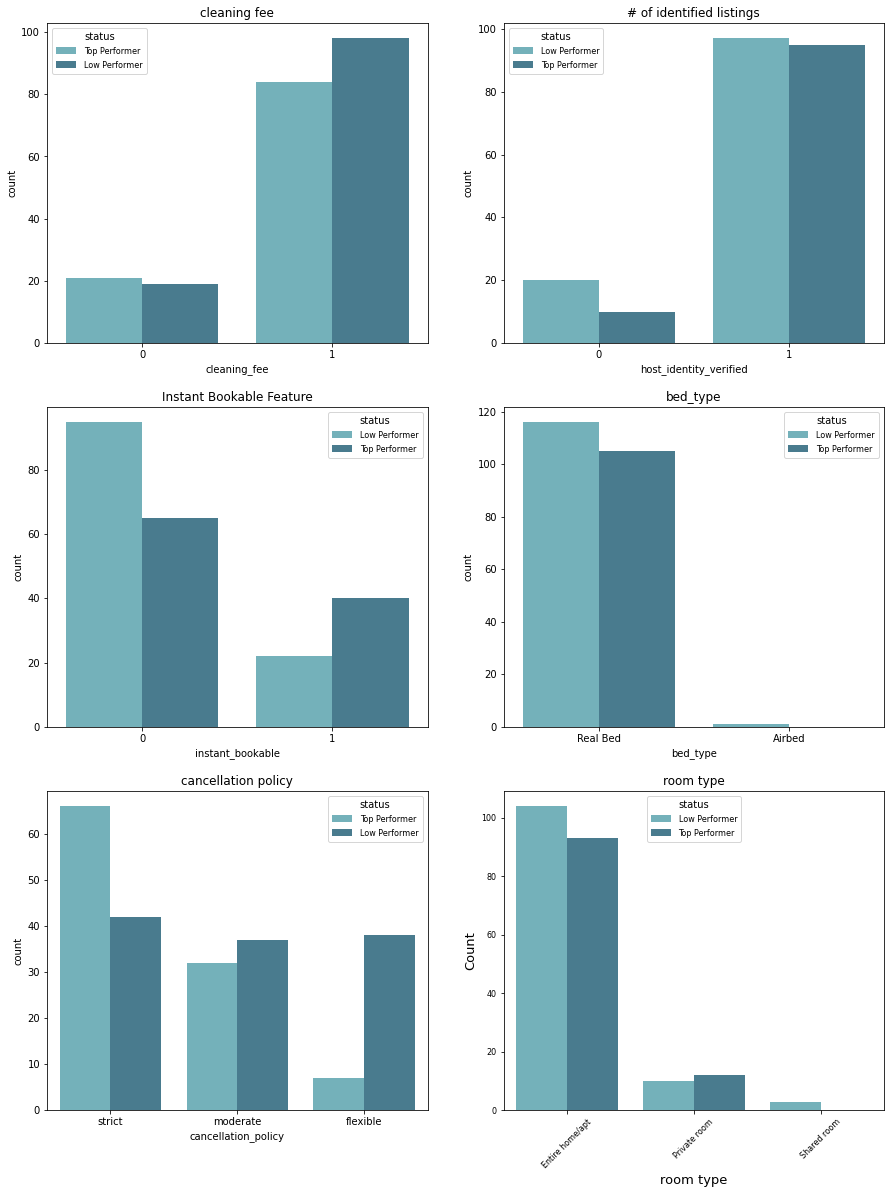

In [105]:
fig, ax = plt.subplots(figsize=(15,20), nrows=3, ncols=2)
x_data= ['cleaning_fee','host_identity_verified','instant_bookable','bed_type','cancellation_policy','room_type']
title= ['cleaning fee','# of identified listings','Instant Bookable Feature','bed_type','cancellation policy','room type']

x_axis= ['Percentage','Activate/Not','Activate/Not', 'feature','cancellation plicy','room type']
y_axis= ['Count']
cnt=0

for x in range(3):
    for y in range(2):
        print(cnt)
        ax[x][y].set_title(title[cnt], fontsize=12)
        sns.countplot(x=x_data[cnt], hue='status', data=data[cnt], palette='GnBu_d', orient='h', ax=ax[x][y])
        plt.setp(ax[x][y].get_legend().get_texts(), fontsize='8') # for legend text
        plt.setp(ax[x][y].get_legend().get_title(), fontsize='10') # for legend title
        plt.xticks(fontsize=8, rotation=45)
        plt.yticks(fontsize=8)
        plt.xlabel(x_axis[cnt], fontsize=13)
        p=plt.ylabel(y_axis[0], fontsize=13)
        
        cnt+=1